### version 2 - with 40 epochs


In [1]:
# Importage
import warnings
warnings.filterwarnings('ignore')

# os stuff
import os
import sys

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi
from nilearn.image import index_img

import seaborn as sns

# whobpyt stuff
import whobpyt
from whobpyt.data.dataload import dataloader
# from whobpyt.models.jansen_rit import RNNJANSEN
from whobpyt.models.wong_wang import RNNRWW
from whobpyt.datatypes.modelparameters import ParamsModel
from whobpyt.optimization.modelfitting import Model_fitting

# array and pd stuff
import numpy as np
import pandas as pd

# viz stuff
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
import seaborn as sns
import scipy.stats as stats

In [4]:
import pickle

In [6]:
data_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_task_run_pkls_II'

In [7]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_IV/'


In [27]:
node_size = 200
mask = np.tril_indices(node_size, -1)

In [8]:
import re

In [9]:
folder_one_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II'
folder_two_path = SCs_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/All_Subs_SC_Wts/Davide_HCP_Data_Matrix'

# Get the list of files in each folder
folder_one_files = os.listdir(folder_one_path)
folder_two_files = os.listdir(folder_two_path)

# Extract the numbers from the filenames in folder_one
folder_one_numbers = []
for file in folder_one_files:
    match = re.search(r'\d+', file)
    if match:
        folder_one_numbers.append(int(match.group()))

# Extract the numbers from the filenames in folder_two
folder_two_numbers = []
for file in folder_two_files:
    match = re.search(r'\d+', file)
    if match:
        folder_two_numbers.append(int(match.group()))

# Find the common numbers between the two folders
common_numbers = list(set(folder_one_numbers) & set(folder_two_numbers))

sub_list = common_numbers.copy()

sub_list.sort()

sub_list = sub_list[0:200]

In [10]:
sub_list.index(140420) # the task fMRI dtseries for this subject is absent in the HCP S-900 folder in public datasets. 

133

In [11]:
del sub_list[133]

In [12]:
def emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_tfMRI_MOTOR_RL_200Schaefer_7Ntwx_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [13]:
%%time

all_subs_emp_fc = []
for i in range(len(sub_list)):
    ss_emp_fc = emp_fc(sub_list[i])
    all_subs_emp_fc.append(ss_emp_fc)

CPU times: user 59.3 s, sys: 296 ms, total: 59.6 s
Wall time: 1min 5s


In [14]:
%%time
all_subs_emp_fc_mat = []
for i in range(199):
    all_subs_emp_fc_mat.append(np.corrcoef(all_subs_emp_fc[i].T))

CPU times: user 471 ms, sys: 45.2 ms, total: 516 ms
Wall time: 514 ms


In [19]:
pconn_path2 = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'


In [20]:
def rest_emp_fc(sub_id):
    pconn1LR = pconn_path2 + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [21]:
%%time

all_subs_rest_emp_fc = []
for i in range(len(sub_list)):
    ss_rest_emp_fc = rest_emp_fc(sub_list[i])
    all_subs_rest_emp_fc.append(ss_rest_emp_fc)

CPU times: user 58.6 s, sys: 371 ms, total: 58.9 s
Wall time: 1min 1s


In [22]:
%%time
all_subs_rest_emp_fc_mat = []
for i in range(199):
    all_subs_rest_emp_fc_mat.append(np.corrcoef(all_subs_rest_emp_fc[i].T))

CPU times: user 1.35 s, sys: 56.2 ms, total: 1.4 s
Wall time: 1.4 s


In [23]:
len(all_subs_emp_fc_mat)

199

In [24]:
# fig, ax = plt.subplots(figsize=(13,9))
# # plt.plot([all_subs_emp_fc[0][400:600]][0][0])
# plt.plot(sample_ts[10][100:200],color='r',linewidth=3)
# # plt.plot(sample_ts[10][400:600],color='b',linewidth=3)
# plt.grid(False)
# plt.show()

In [25]:
%%time

all_subs_whobpyt_motor_task_fMRI = []

for i in range(199):
    
    sub_id = sub_list[i]
    filename = data_path + '/Subj_{0}_fittingresults_task_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    _test_task_fMRI_mat = np.corrcoef(ss_og_data.output_sim.bold_test)
    
    all_subs_whobpyt_motor_task_fMRI.append(_test_task_fMRI_mat)
    
    del ss_og_data


CPU times: user 15.7 s, sys: 54 s, total: 1min 9s
Wall time: 4min 46s


In [28]:
corrs_list = []
for i in range(199):
    corrs_list.append(np.corrcoef(all_subs_emp_fc_mat[i][mask], all_subs_whobpyt_motor_task_fMRI[i][mask])[0][1])

In [29]:
print(np.mean(corrs_list))
print(np.std(corrs_list))

0.34182534461111924
0.07561044646658799


### epoch = 60

In [46]:
data_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_task_run_pkls_III'

In [48]:
%%time

all_subs_whobpyt_motor_task_fMRI = []

for i in range(199):
    
    sub_id = sub_list[i]
    filename = data_path + '/Subj_{0}_fittingresults_task_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    _test_task_fMRI_mat = np.corrcoef(ss_og_data.output_sim.bold_test)
    
    all_subs_whobpyt_motor_task_fMRI.append(_test_task_fMRI_mat)
    
    del ss_og_data


CPU times: user 18 s, sys: 1min 6s, total: 1min 24s
Wall time: 5min 34s


In [49]:
corrs_list = []
for i in range(199):
    corrs_list.append(np.corrcoef(all_subs_emp_fc_mat[i][mask], all_subs_whobpyt_motor_task_fMRI[i][mask])[0][1])

In [50]:
print(np.mean(corrs_list))
print(np.std(corrs_list))

0.3502893344892485
0.07712069273747961


In [53]:
len(all_subs_whobpyt_motor_task_fMRI)

199

In [54]:
all_subs_whobpyt_motor_task_fMRI[0].shape

(200, 200)

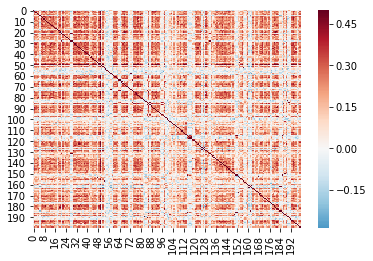

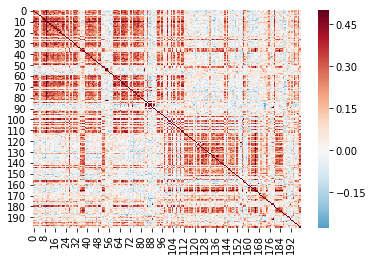

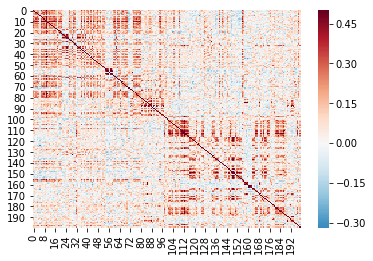

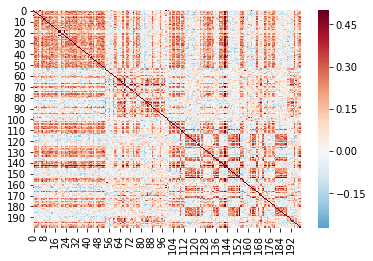

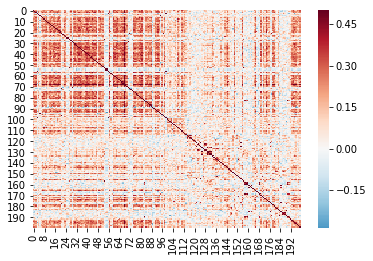

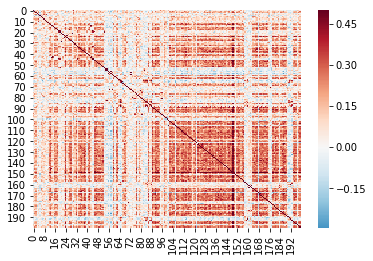

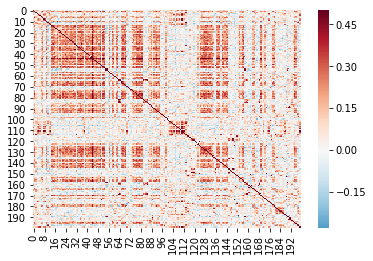

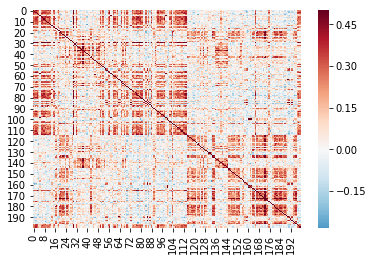

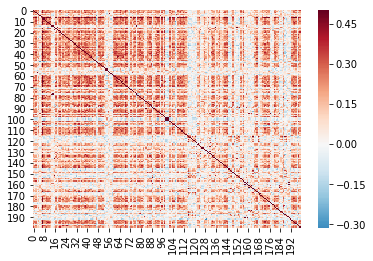

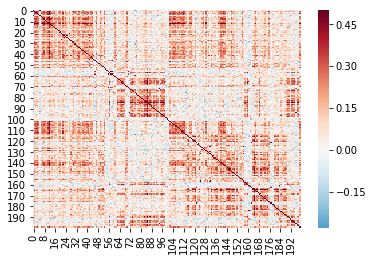

In [58]:
for i in range(10):
    fig,ax = plt.subplots()
    sns.heatmap(all_subs_whobpyt_motor_task_fMRI[i],center=0,cmap='RdBu_r',vmax=0.5)
    plt.show()

In [74]:
b = np.random.randint(1,199,10)
b

array([ 57,  36,  37, 195, 180, 161, 170, 107, 118, 176])

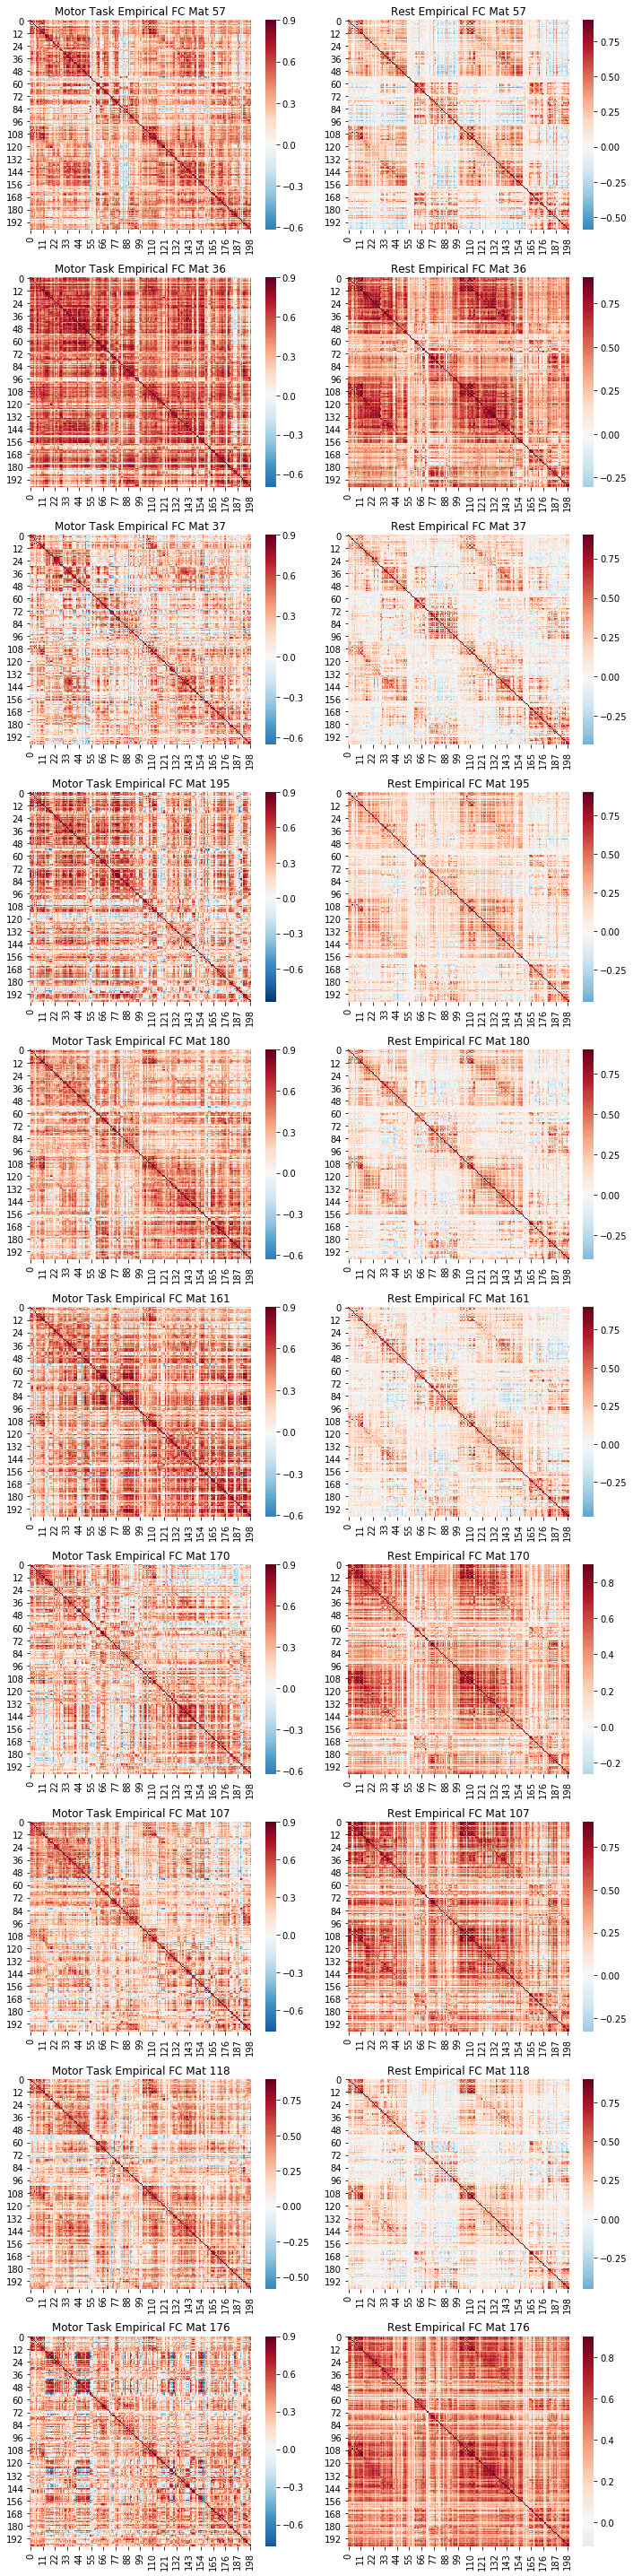

In [75]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 40))

for i in range(10):
    sns.heatmap(all_subs_emp_fc_mat[b[i]], center=0, cmap='RdBu_r', vmax=0.9, ax=axes[i, 0])
    axes[i, 0].set_title(f'Motor Task Empirical FC Mat {b[i]}')

# Plotting Rest Empirical FC Matrices
for i in range(10):
    sns.heatmap(all_subs_rest_emp_fc_mat[b[i]], center=0, cmap='RdBu_r', vmax=0.9, ax=axes[i, 1])
    axes[i, 1].set_title(f'Rest Empirical FC Mat {b[i]}')

plt.tight_layout()
plt.show()

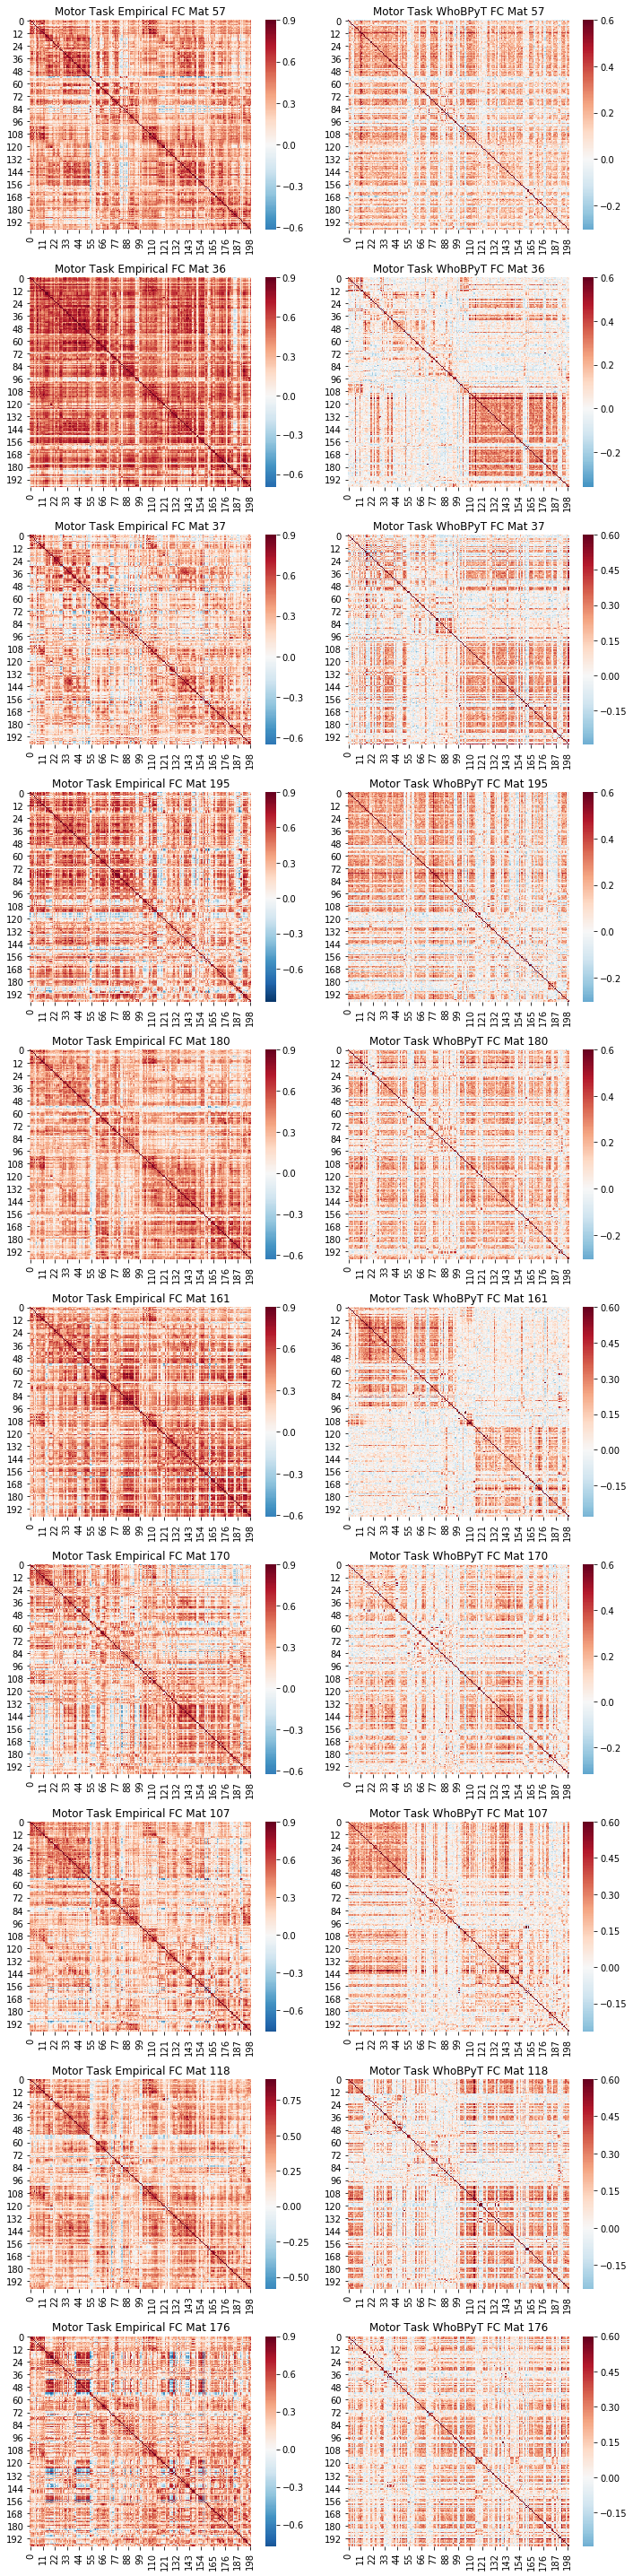

In [76]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 40))

for i in range(10):
    sns.heatmap(all_subs_emp_fc_mat[b[i]], center=0, cmap='RdBu_r', vmax=0.9, ax=axes[i, 0])
    axes[i, 0].set_title(f'Motor Task Empirical FC Mat {b[i]}')

# Plotting task whobpyt FC Matrices
for i in range(10):
    sns.heatmap(all_subs_whobpyt_motor_task_fMRI[b[i]], center=0, cmap='RdBu_r', vmax=0.6, ax=axes[i, 1])
    axes[i, 1].set_title(f'Motor Task WhoBPyT FC Mat {b[i]}')

plt.tight_layout()
plt.show()

In [79]:
output_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_task_run_pkls_III_conn_mats_only'

In [80]:
for i in range(199):
    sub_id = sub_list[i]
    np.savetxt(output_path + '/motor_task_og_whobpyt_Subj_{0}_con_mat.txt'.format(sub_id), all_subs_whobpyt_motor_task_fMRI[i])


### graveyard

In [51]:
data_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_rs_fMRI_chunks_I'

In [52]:
%%time

all_subs_whobpyt_chunked_rs_fMRI = []

for i in range(199):
    
    sub_id = sub_list[i]
    filename = data_path + '/Subj_{0}_fittingresults_stim_exp.pkl'.format(sub_id)
    with open(filename, 'rb') as f:
        ss_og_data = pickle.load(f)
    
    _test_chunked_rs_fMRI_mat = np.corrcoef(ss_og_data.output_sim.bold_test)
    
    all_subs_whobpyt_chunked_rs_fMRI.append(_test_chunked_rs_fMRI_mat)
    
    del ss_og_data


FileNotFoundError: [Errno 2] No such file or directory: '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_rs_fMRI_chunks_I/Subj_100206_fittingresults_stim_exp.pkl'